In [7]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "/Data Science Softwares/Plant Detection/archive_3/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [10]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "/Data Science Softwares/Plant Detection/archive_3/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [13]:
cnn=tf.keras.models.Sequential()

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



In [17]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [27]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                        

In [31]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


98/98 [==============================] - 158s 1s/step - loss: 10.5177 - accuracy: 0.0279 - val_loss: 3.5831 - val_accuracy: 0.0342
Epoch 2/32
98/98 [==============================] - 151s 1s/step - loss: 3.5802 - accuracy: 0.0311 - val_loss: 3.5672 - val_accuracy: 0.0484
Epoch 3/32
98/98 [==============================] - 143s 1s/step - loss: 3.5673 - accuracy: 0.0392 - val_loss: 3.5653 - val_accuracy: 0.0456
Epoch 4/32
98/98 [==============================] - 157s 2s/step - loss: 3.5398 - accuracy: 0.0526 - val_loss: 3.5314 - val_accuracy: 0.0541
Epoch 5/32
98/98 [==============================] - 145s 1s/step - loss: 3.4918 - accuracy: 0.0584 - val_loss: 3.4838 - val_accuracy: 0.0798
Epoch 6/32
98/98 [==============================] - 142s 1s/step - loss: 3.4309 - accuracy: 0.0815 - val_loss: 3.3595 - val_accuracy: 0.1168
Epoch 7/32
98/98 [==============================] - 169s 2s/step - loss: 3.3522 - accuracy: 0.1043 - val_loss: 3.2324 - val_accuracy: 0.1681
Epoch 8/32

In [37]:
train_loss,train_acc=cnn.evaluate(training_set)
print("Training Accuracy",train_acc)

98/98 [==============================] - 64s 617ms/step - loss: 0.6452 - accuracy: 0.8369
Training Accuracy 0.8369181156158447


In [38]:
val_loss,val_acc=cnn.evaluate(validation_set)
print("Validation Accuracy",val_acc)

11/11 [==============================] - 9s 266ms/step - loss: 0.8870 - accuracy: 0.8319
Validation Accuracy 0.8319088220596313


In [ ]:
cnn.save('planttrinedmodel.h5')

In [41]:
training_history.history

{'loss': [10.517688751220703,
  3.5801618099212646,
  3.5672874450683594,
  3.539781093597412,
  3.491831064224243,
  3.430915594100952,
  3.3522274494171143,
  3.254946231842041,
  3.1656315326690674,
  3.083002805709839,
  2.9719574451446533,
  2.8606832027435303,
  2.7270917892456055,
  2.6151461601257324,
  2.4898645877838135,
  2.371589422225952,
  2.29266095161438,
  2.125466823577881,
  2.0951831340789795,
  1.9146138429641724,
  1.8107410669326782,
  1.6557886600494385,
  1.6061344146728516,
  1.5108978748321533,
  1.366188645362854,
  1.3170549869537354,
  1.2806354761123657,
  1.1648348569869995,
  1.0889192819595337,
  1.0958187580108643,
  0.979787290096283,
  0.9472536444664001],
 'accuracy': [0.02792937308549881,
  0.031139647588133812,
  0.039165329188108444,
  0.05264847353100777,
  0.05842696502804756,
  0.08154092729091644,
  0.10433387011289597,
  0.12327447533607483,
  0.14414125680923462,
  0.16500802338123322,
  0.1945425420999527,
  0.21926163136959076,
  0.26067

In [67]:
import json
with open('training_history.json','w') as f:
    json.dump(training_history.history,f)

In [43]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


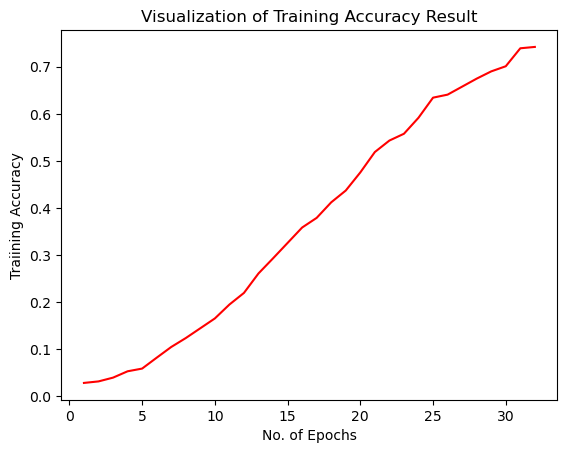

In [45]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

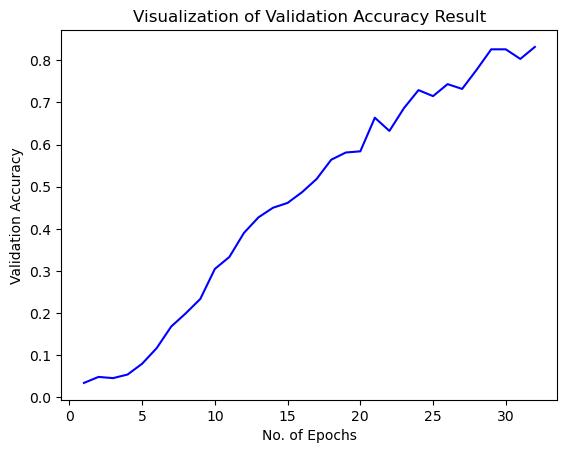

In [47]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()